<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Car%20price/classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Загрузка данных**

In [1]:
import numpy as np

In [2]:
! gdown --id 1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ
To: /content/churn-modeling.zip
100% 268k/268k [00:00<00:00, 5.45MB/s]


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/churn-modeling.zip')

# **Обучающая, тестовая и валидационные выборка**



In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])

In [7]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])

# **Человеческое обучение**

In [8]:
train['age_group'] = pd.cut(train['Age'],[0,31,35,40,46,float('inf')])

In [9]:
model = train.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()

<ipython-input-9-36b672851a22>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()


In [10]:
model

,NumOfProducts,age_group,Exited
0,1,"(0.0, 31.0]",0.110764
1,1,"(31.0, 35.0]",0.140449
2,1,"(35.0, 40.0]",0.209337
3,1,"(40.0, 46.0]",0.370441
4,1,"(46.0, inf]",0.527607
5,2,"(0.0, 31.0]",0.033289
6,2,"(31.0, 35.0]",0.028037
7,2,"(35.0, 40.0]",0.061069
8,2,"(40.0, 46.0]",0.108647
9,2,"(46.0, inf]",0.236364


In [11]:
model = model.rename({'Exited':'score_prod_age'},axis=1)

In [12]:
train = train.merge(model,how='left',on=['NumOfProducts','age_group'])

In [13]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [14]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group'])

In [15]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [16]:
from catboost import CatBoostClassifier

In [17]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [19]:
X = (['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'])

cat_features = ['Geography','Gender']

y = ['Exited']


In [20]:
df.select_dtypes(include='object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [21]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features)

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features)

In [22]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [23]:
model = CatBoostClassifier(**params)

In [24]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 55.5ms	remaining: 55.4s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 880ms	remaining: 7.83s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 1.57s	remaining: 6.23s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 2.65s	remaining: 6.17s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 3.83s	remaining: 5.72s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 5.06s	remaining: 5.04s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 6.86s	remaining: 4.55s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 8.54s	remaining: 3.64s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 9.72s	remaining: 2.41s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 11s	remaining: 1.21s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 12.8s	remaining: 0us

bestTest = 0.318

In [25]:
test['score_catboost'] = model.predict_proba(test[X])[:,1]

# **Скор и пороги**

In [26]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715


In [27]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

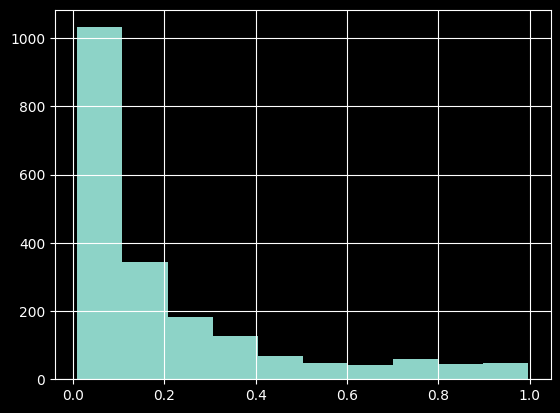

In [28]:
test['score_catboost'].hist();

In [29]:
train['Exited'].mean()

np.float64(0.20366666666666666)

In [30]:
test['y_pred'] = (test['score_catboost'] > 0.5) * 1

In [31]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


In [32]:
test['y_pred'].mean()

np.float64(0.1225)

# **Матрица ошибок**

In [33]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(test['Exited'],test['y_pred'])

array([[1537,   56],
       [ 218,  189]])

In [36]:
tn, fp, fn, tp = confusion_matrix(test['Exited'],test['y_pred']).ravel()

In [37]:
tn, fp, fn, tp

(np.int64(1537), np.int64(56), np.int64(218), np.int64(189))

# **Recall(полнота)**

In [38]:
recall = tp / (tp + fn)

In [39]:
from sklearn.metrics import recall_score

In [40]:
recall_score(test['Exited'],test['y_pred'])

0.4643734643734644

In [41]:
test['y_pred_1'] = 1

In [42]:
recall_score(test['Exited'],test['y_pred_1'])

1.0

# **Precision**

In [43]:
precision = tp / (tp + fp)

In [44]:
from sklearn.metrics import precision_score

In [45]:
precision_score(test['Exited'],test['y_pred'])

0.7714285714285715

In [46]:
precision_score(test['Exited'],test['y_pred_1'])

0.2035

In [47]:
test['Exited'].mean()

np.float64(0.2035)

# **F1**

In [48]:
f1 = (2 * recall * precision) / (recall + precision)

In [49]:
f1

np.float64(0.5797546012269938)

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(test['Exited'],test['y_pred'])

0.5797546012269938

# **Accuracy**

In [52]:
(test['Exited'] == test['y_pred']).mean()

np.float64(0.863)

In [53]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.863)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(test['Exited'],test['y_pred'])

0.863

In [56]:
test['Exited'].mean()

np.float64(0.2035)

In [57]:
test['y_pred0'] = 0

In [58]:
accuracy_score(test['Exited'],test['y_pred0'])

0.7965

In [59]:
1 - test['Exited'].mean()

np.float64(0.7965)

# **Classification report**

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(test['Exited'],test['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [62]:
precision

np.float64(0.7714285714285715)

In [63]:
recall

np.float64(0.4643734643734644)

In [64]:
f1

np.float64(0.5797546012269938)

# **Предикт с другим порогом**

In [65]:
test['y_pred_new'] = (test['score_catboost'] > 0.4) * 1

In [66]:
f1_score(test['Exited'],test['y_pred'])

0.5797546012269938

In [67]:
f1_score(test['Exited'],test['y_pred_new'])

0.6104972375690608

In [68]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred,y_pred_1,y_pred0,y_pred_new
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,...,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0,1,0,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,...,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0,1,0,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,...,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0,1,0,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,...,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0,1,0,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,...,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,...,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0,1,0,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,...,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0,1,0,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,...,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0,1,0,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,...,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0,1,0,0


In [69]:
len(test['score_catboost'])

2000

In [70]:
test['score_catboost'].nunique()

2000

In [71]:
thrs = [0] + list(test['score_catboost'].unique())

In [72]:
from tqdm.notebook import tqdm

In [73]:
result =[]
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_catboost'] > thr) *1
  result.append((thr,
                 f1_score(test['Exited'],test['y_pred_new'])))

  0%|          | 0/2001 [00:00<?, ?it/s]

In [74]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [75]:
t[:10]

,thr,f1
0,0.000000,0.338180
1,0.131844,0.553628
2,0.074020,0.471744
3,0.186876,0.593807
4,0.087403,0.494024
5,0.056658,0.436807
6,0.061611,0.446101
7,0.556316,0.554487
8,0.203887,0.609615
9,0.045556,0.408415


In [76]:
t.sort_values('f1',ascending=False)

,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [77]:
t[t['f1'] == t['f1'].max()]

,thr,f1
640,0.277932,0.636771


In [78]:
thrs = [0] + list(test['score_prod_age'].unique())

In [79]:
thrs = [0] + list(test['score_prod_age'].unique())

In [80]:
len(thrs)

17

In [81]:
result =[]
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_prod_age'] > thr) *1
  result.append((thr,
                 f1_score(test['Exited'],test['y_pred_new'])))

  0%|          | 0/17 [00:00<?, ?it/s]

In [82]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [83]:
t[:10]

,thr,f1
0,0.000000,0.338180
1,0.110764,0.483894
2,0.140449,0.515651
3,0.209337,0.537223
4,0.527607,0.218884
5,0.108647,0.453875
6,0.028037,0.359661
7,0.061069,0.431328
8,0.236364,0.559441
9,0.033289,0.399200


In [84]:
t[t['f1'] == t['f1'].max()]

,thr,f1
8,0.236364,0.559441


# **ROC**

In [85]:
from sklearn.metrics import roc_curve

In [86]:
fprs, tprs, thrs = roc_curve(test['Exited'],test['score_catboost'])

In [87]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

In [88]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,inf
1,0.000000,0.002457,0.997318
2,0.000000,0.061425,0.933737
3,0.000628,0.061425,0.933203
4,0.000628,0.120393,0.891551
...,...,...,...
391,0.979912,0.995086,0.012212
392,0.979912,0.997543,0.012198
393,0.998745,0.997543,0.009886
394,0.998745,1.000000,0.009809


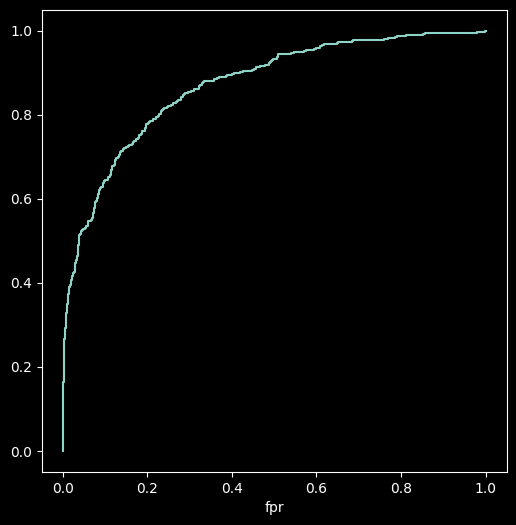

In [89]:
roc.set_index('fpr')['tpr'].plot(figsize=(6,6));

In [90]:
roc['random'] = roc['fpr']

In [91]:
roc['ideal'] = 1

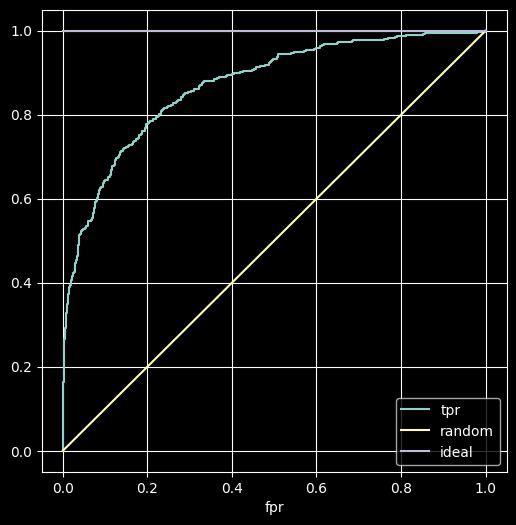

In [92]:
roc.plot(x='fpr',y=['tpr','random','ideal'],figsize=(6,6),grid=True);

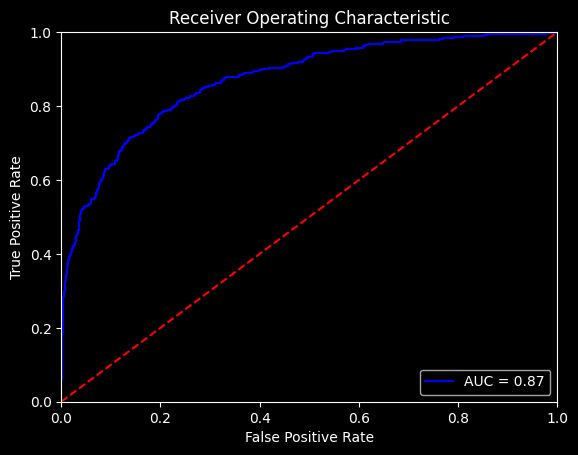

In [93]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Exited'], test['score_catboost'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
from catboost.utils import get_roc_curve

In [95]:
test_data = Pool(data=test[X],
                 label=test[y],
                 cat_features=cat_features)


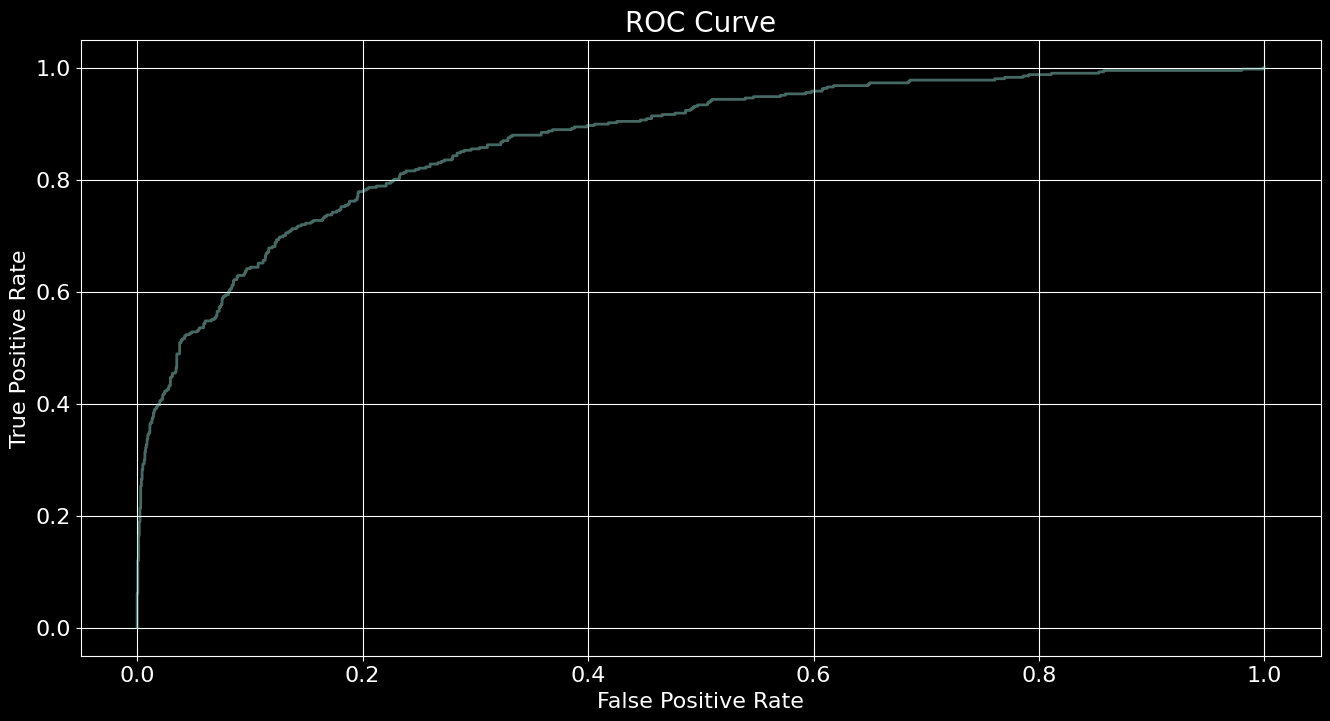

(array([0.        , 0.        , 0.        , ..., 0.99874451, 0.99937225,
        1.        ]),
 array([0.      , 0.002457, 0.004914, ..., 1.      , 1.      , 1.      ]),
 array([1.        , 0.99728129, 0.99609316, ..., 0.00963386, 0.00941501,
        0.        ]))

In [96]:
get_roc_curve(model,test_data,plot=True)

# **AUC**

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(test['Exited'],test['score_catboost'])

np.float64(0.8703063618317854)

In [99]:
params = {'verbose':100,
          'eval_metric':'AUC',
          'random_seed':42,
          'learning_rate':0.01}

In [100]:
model = CatBoostClassifier(**params)

In [101]:
model.fit(train_data,eval_set=valid_data)

0:	test: 0.8338545	best: 0.8338545 (0)	total: 6.55ms	remaining: 6.54s
100:	test: 0.8725090	best: 0.8725090 (100)	total: 569ms	remaining: 5.07s
200:	test: 0.8784656	best: 0.8784656 (200)	total: 1.12s	remaining: 4.47s
300:	test: 0.8812676	best: 0.8812676 (300)	total: 1.68s	remaining: 3.89s
400:	test: 0.8823868	best: 0.8824376 (390)	total: 2.21s	remaining: 3.31s
500:	test: 0.8834491	best: 0.8834522 (498)	total: 2.77s	remaining: 2.75s
600:	test: 0.8834737	best: 0.8836554 (564)	total: 3.31s	remaining: 2.2s
700:	test: 0.8837847	best: 0.8838694 (685)	total: 3.85s	remaining: 1.64s
800:	test: 0.8834383	best: 0.8838694 (685)	total: 4.38s	remaining: 1.09s
900:	test: 0.8829318	best: 0.8838694 (685)	total: 4.93s	remaining: 542ms
999:	test: 0.8822744	best: 0.8838694 (685)	total: 5.5s	remaining: 0us

bestTest = 0.8838694083
bestIteration = 685

Shrink model to first 686 iterations.


# **ROC AUC присильно несбалансированных классах**

In [104]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})

In [105]:
t.mean()

,0
y_true,0.01


In [106]:
import numpy as np

In [107]:
np.random.uniform(0,0.2)

0.054304008218729716

In [111]:
np.concatenate([np.random.uniform(0,0.02,size=2),np.random.uniform(0.8,1,size=3)])

array([0.01192019, 0.01585122, 0.9385021 , 0.82730163, 0.93729174])

In [116]:
np.random.seed(42)
t['y_score1'] = np.concatenate([np.random.uniform(0,0.02,size=970), # TN
                               np.random.uniform(0,0.8,size=20),    # TP
                               np.random.uniform(0,0.02,size=5),    # FN
                               np.random.uniform(0,0.8,size=5)])    # TP

In [117]:
roc_auc_score(t['y_true'],t['y_score1'])

np.float64(0.7664646464646465)

In [120]:
np.random.seed(42)
t['y_score2'] = np.concatenate([np.random.uniform(0,0.02,size=850), # TN
                               np.random.uniform(0,0.8,size=140),    # TP
                               np.random.uniform(0,0.02,size=2),    # FN
                               np.random.uniform(0,0.8,size=8)])    # TP

In [121]:
roc_auc_score(t['y_true'],t['y_score2'])

np.float64(0.8745454545454546)